In [3]:
import numpy as np

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
normal_data = np.load("../../data/wadi/normal_pc4.npy")

In [36]:
#gen regions
regions=[]
for i in np.logspace(1, np.log10(normal_data.shape[0]), 12):
    print("len = ", i)
    for j in np.arange(0, normal_data.shape[0]-i, (i+1)//2):
        regions.append([int(j),int(j+i)])
regions = np.array(regions)
print("have %d regions"%len(regions) )

len =  10.0
len =  28.977330630902852
len =  83.96856904926607
len =  243.31849879443772
len =  705.0720588181362
len =  2043.1106166984505
len =  5920.389185557879
len =  17155.707489353223
len =  49712.66081260453
len =  144054.02089087683
len =  417430.09920659225
len =  1209600.9999999995
have 372251 regions


In [108]:
choice = np.random.choice(range(len(regions)), size=10000, replace=False).astype(int)
sparse_regions = np.array(regions)[np.array(choice)]

In [109]:
dim = normal_data.shape[1]
m3_dim=10
new_features = np.zeros((sparse_regions.shape[0],(dim+dim*dim + m3_dim*m3_dim*m3_dim)))

In [110]:
moment3 = np.zeros((m3_dim, m3_dim, m3_dim))
for i in range(0*sparse_regions.shape[0]//10, 10*sparse_regions.shape[0]//10 ):
    region_bnd=sparse_regions[i]
    region = range(region_bnd[0], region_bnd[1])
    #print("region.len", len(region))
    #region = range(10,30)
    if(i%1000==0):
        print("i = ", i,"region.len", len(region))

    moment1 = np.sum(normal_data[region,:], axis=0)/len(region)
    moment2 = np.matmul(normal_data[region,:].transpose(), normal_data[region,:])/len(region)    
    for j in range(m3_dim):
        for k in range(i,m3_dim):
            for l in range(j,m3_dim):
                ans = np.sum(normal_data[region,:][:,l]*normal_data[region,:][:,j]*normal_data[region,:][:,k])
                moment3[l][j][k]= ans
                moment3[l][k][j]= ans
                moment3[j][l][k]= ans
                moment3[j][k][l]= ans
                moment3[k][j][l]= ans
                moment3[k][l][j]= ans
    moment3 /= len(region)
    new_features[i] = np.concatenate((moment1.ravel(), moment2.ravel(), moment3.ravel()))

i =  0 region.len 10
i =  1000 region.len 10
i =  2000 region.len 10
i =  3000 region.len 10
i =  4000 region.len 83
i =  5000 region.len 10
i =  6000 region.len 10
i =  7000 region.len 10
i =  8000 region.len 10
i =  9000 region.len 28


In [111]:
delete_labels = []
for i in range(dim):
    for j in range(dim):
        if(j<i):
            delete_labels.append(dim+i*dim+j)
for i in range(m3_dim):
    for j in range(m3_dim):
        for k in range(m3_dim):
            if(j<i or k<i or k<j):
                delete_labels.append(dim+dim*dim+i*m3_dim*m3_dim + j*m3_dim+k)
keep_labels = np.array([i for i in range(new_features.shape[1]) if i not in delete_labels])

In [112]:
keep_labels = np.array([i for i in range(new_features.shape[1]) if i not in delete_labels])

In [113]:
np.sum(new_features[1]!=0)

2640

In [114]:
delete_features = new_features[:, keep_labels]

In [115]:
delete_features.shape

(10000, 1080)

In [116]:
from sklearn.decomposition import PCA


In [117]:
pca_dim=600
pca = PCA(n_components=pca_dim)
pca.fit(delete_features)
print(np.sum(pca.explained_variance_ratio_))

0.9992353492732418


In [127]:
from joblib import dump, load

In [128]:
dump(pca, "moment_pca.joblib")

['moment_pca.joblib']

In [129]:
pca2 = load("moment_pca.joblib")

In [131]:
np.max(np.abs(pca2.transform(delete_features[:2,:])-pca.transform(delete_features[:2,:])))

0.0

In [122]:
dim = normal_data.shape[1]
m3_dim=10
final_features = np.zeros((regions.shape[0],len(keep_labels)))

In [123]:
moment3 = np.zeros((m3_dim, m3_dim, m3_dim))
for i in range(0, regions.shape[0]):
    region_bnd=regions[i]
    region = range(region_bnd[0], region_bnd[1])
    #print("region.len", len(region))
    #region = range(10,30)
    if((i+1)%4000==0):
        print("i = ", i,"region.len", len(region))

    moment1 = np.sum(normal_data[region,:], axis=0)/len(region)
    moment2 = np.matmul(normal_data[region,:].transpose(), normal_data[region,:])/len(region)    
    for j in range(m3_dim):
        for k in range(i,m3_dim):
            for l in range(j,m3_dim):
                ans = np.sum(normal_data[region,:][:,l]*normal_data[region,:][:,j]*normal_data[region,:][:,k])
                moment3[l][j][k]= ans
                moment3[l][k][j]= ans
                moment3[j][l][k]= ans
                moment3[j][k][l]= ans
                moment3[k][j][l]= ans
                moment3[k][l][j]= ans
    moment3 /= len(region)
    final_feature_i = np.concatenate((moment1.ravel(), moment2.ravel(), moment3.ravel()))[keep_labels]
    #final_feature_i = pca.transform(final_feature_i.reshape(1,-1))
    final_features[i] =  final_feature_i

i =  3999 region.len 10
i =  7999 region.len 10
i =  11999 region.len 10
i =  15999 region.len 10
i =  19999 region.len 10
i =  23999 region.len 10
i =  27999 region.len 10
i =  31999 region.len 10
i =  35999 region.len 10
i =  39999 region.len 10
i =  43999 region.len 10
i =  47999 region.len 10
i =  51999 region.len 10
i =  55999 region.len 10
i =  59999 region.len 10
i =  63999 region.len 10
i =  67999 region.len 10
i =  71999 region.len 10
i =  75999 region.len 10
i =  79999 region.len 10
i =  83999 region.len 10
i =  87999 region.len 10
i =  91999 region.len 10
i =  95999 region.len 10
i =  99999 region.len 10
i =  103999 region.len 10
i =  107999 region.len 10
i =  111999 region.len 10
i =  115999 region.len 10
i =  119999 region.len 10
i =  123999 region.len 10
i =  127999 region.len 10
i =  131999 region.len 10
i =  135999 region.len 10
i =  139999 region.len 10
i =  143999 region.len 10
i =  147999 region.len 10
i =  151999 region.len 10
i =  155999 region.len 10
i =  159999 r

In [124]:
final_features_pca = pca.transform(final_features)

In [134]:
size = np.array([region[1]-region[0] for region in regions])

In [135]:
size.shape

(372251,)

In [136]:
np.save("../../data/wadi/moment_normal.npy", np.concatenate((final_features_pca, size.reshape(len(regions),1)), axis=1))

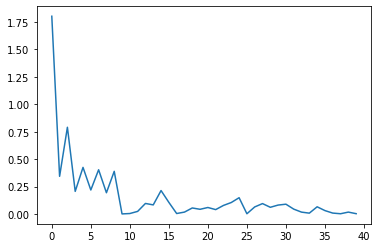

In [20]:
plt.figure()
plt.plot(np.abs(moment1))

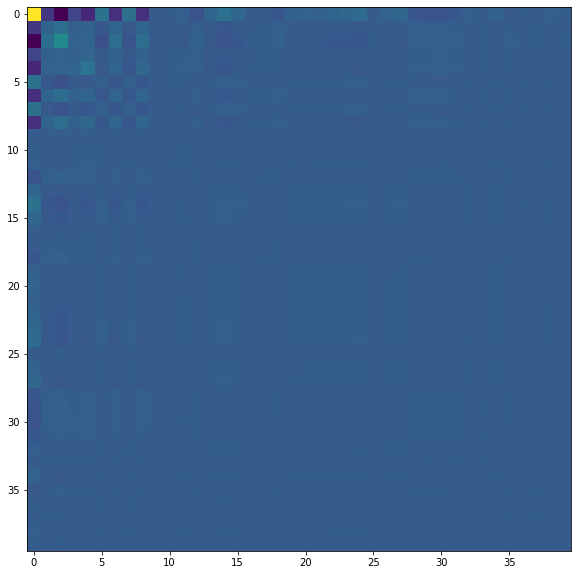

In [26]:
plt.figure(figsize=(20,10))
plt.imshow(moment2*30000)

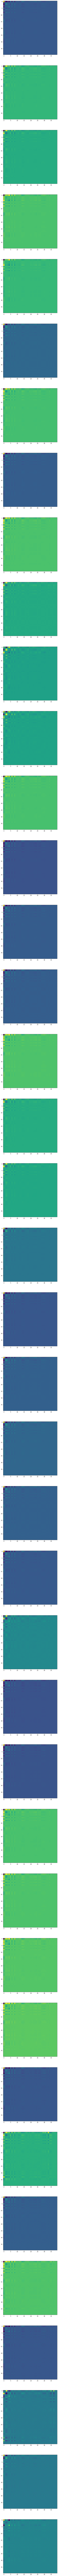

In [29]:
plt.figure(figsize=(20,10*dim))
for i in range(dim):
    plt.subplot(dim, 1, i+1)
    plt.imshow(moment3[i])

In [19]:
new_feature = np.concatenate((moment1.ravel(), moment2.ravel(), moment3.ravel(),[len(region)]))

In [20]:
len(new_feature)

65641

In [11]:
len(regions)

372251